In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

amzn = pd.read_csv('../data/amzn_stock.csv', index_col = 'Date', parse_dates=['Date'])
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [3]:
amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

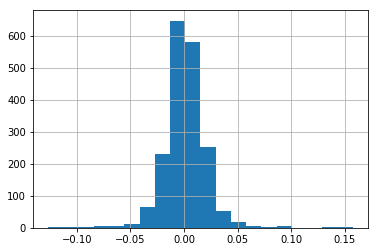

In [5]:
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins=20)

In [6]:
mean = amzn_daily_return.mean()
std = amzn_daily_return.std()

In [7]:
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)

In [8]:
pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
print('{:.3f} fall within 1 standard deviation. '
     '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.787 fall within 1 standard deviation. 0.956 within 2 and 0.985 within 3


In [9]:
type(amzn_daily_return)

pandas.core.series.Series

In [10]:
type(abs_z_score)

pandas.core.series.Series

0.742 fall within 1 standard deviation. 0.946 within 2 and 0.986 within 3


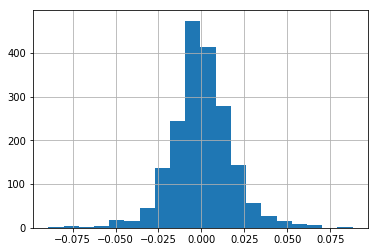

In [11]:
def test_return_normality(stock_data):
    close =stock_data['Close']
    # pct_change는 이전 값과 현재값의 변화율을 리턴
    daily_return = close.pct_change().dropna()
    daily_return.hist(bins=20)
    mean = daily_return.mean()
    std = daily_return.std()
    # 각 값에서 평균을 빼고 절댓값을 취해서 표준편차로 나눠줌.
    abs_z_score = abs(daily_return - mean) / std
    # Pandas Series.lt() is used to compare two series and returnBoolean value
    # for every respective element.
    pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
    
    print('{:.3f} fall within 1 standard deviation. '
     '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

slb = pd.read_csv('../data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
test_return_normality(slb)

In [13]:
abs_z_score[1]

0.9756939885432068

In [16]:
pcts

[0.7873350923482849, 0.9562005277044855, 0.9846965699208443]